<a href="https://colab.research.google.com/github/AshishKumarSingh03/DS_Internship_Learnsmasher/blob/main/Future_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gitpython
from git import Repo
!git clone https://github.com/AshishKumarSingh03/DS_Internship_Learnsmasher.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
Cloning into 'DS_Internship_Learnsmasher'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 1.36 MiB | 2.54 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [4]:
data=pd.read_csv('/content/DS_Internship_Learnsmasher/future sales.csv') # importing the data set

In [5]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: >

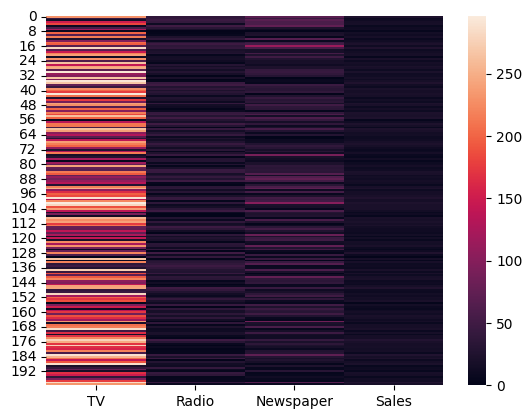

In [6]:
sns.heatmap(data)

In [7]:
data.head(15) # top 15  rows of the data set

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [8]:
data.tail(15) # 15 rows from the bottom

,TV,Radio,Newspaper,Sales
185,205.0,45.1,19.6,22.6
186,139.5,2.1,26.6,10.3
187,191.1,28.7,18.2,17.3
188,286.0,13.9,3.7,20.9
189,18.7,12.1,23.4,6.7
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3


In [9]:
data.shape # shape of the data

(200, 4)

In [10]:
data.columns 

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
for i in range(len(data.columns)):
 
  print("The ",i+1 ,"column of given data is :",data.columns[i])

print("The Features of the data is :" ,data.columns[0],",",data.columns[1],",",data.columns[2])
  



The  1 column of given data is : TV
The  2 column of given data is : Radio
The  3 column of given data is : Newspaper
The  4 column of given data is : Sales
The Features of the data is : TV , Radio , Newspaper


In [12]:
len(data.columns)

4

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
data.describe(include="all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [16]:
data.isnull().sum(axis=0)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [18]:
data.sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

In [19]:
data.max()


TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [20]:
data.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [21]:
data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

<Figure size 800x600 with 0 Axes>

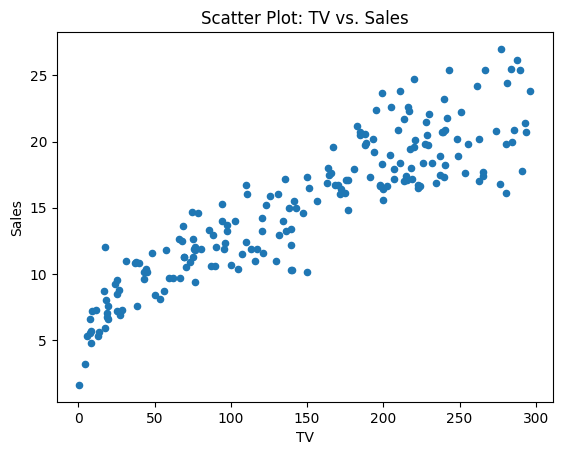

In [22]:
# Visualizing the relationship between a "TV" feature and "sales" response
plt.figure(figsize=(8, 6))

data.plot(kind='scatter', x='TV', y='Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV vs. Sales')

plt.show()


<Figure size 800x600 with 0 Axes>

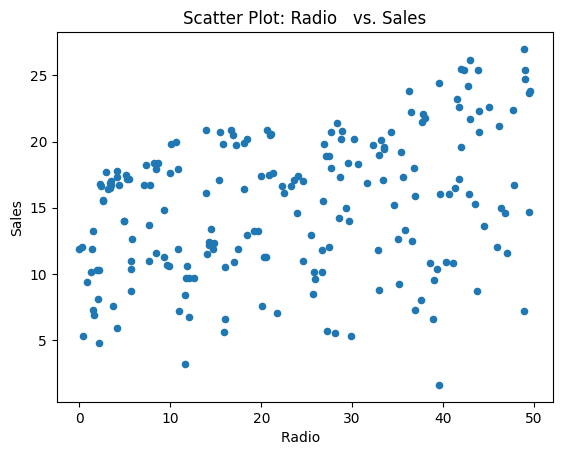

In [23]:
# Visualizing the relationship between a "Radio" feature and "sales" response
plt.figure(figsize=(8, 6))

data.plot(kind='scatter', x='Radio', y='Sales')
plt.xlabel('Radio  ')
plt.ylabel('Sales')
plt.title('Scatter Plot: Radio   vs. Sales')

plt.show()


<Figure size 800x600 with 0 Axes>

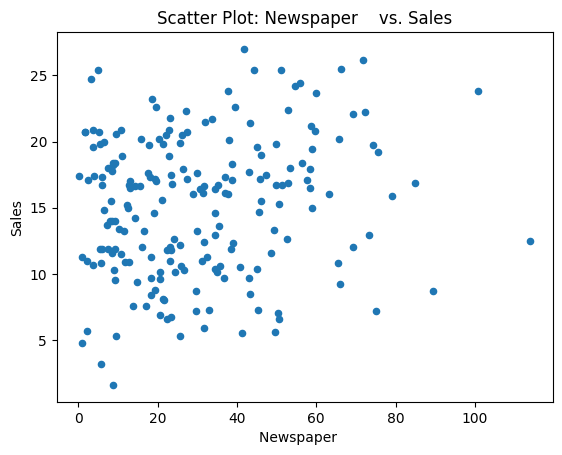

In [24]:
# Visualizing the relationship between a "Newspaper " feature and "sales" response
plt.figure(figsize=(8, 6))

data.plot(kind='scatter', x='Newspaper', y='Sales')
plt.xlabel('Newspaper   ')
plt.ylabel('Sales')
plt.title('Scatter Plot: Newspaper    vs. Sales')

plt.show()


In [25]:
features = data.iloc[:, :-1]
features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
response=data.iloc[:,-1:]

response

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
Model=LinearRegression()
Model.fit(features,response)


LinearRegression()

In [29]:


Intercept=float(Model.intercept_)
print("The intercept of the fitted model is:=", Intercept)

The intercept of the fitted model is:= 4.625124078808653


In [30]:
coeficient=Model.coef_
print("The Coefficient of the fitted model is:" , coeficient)

The Coefficient of the fitted model is: [[0.05444578 0.10700123 0.00033566]]


In [31]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=data).fit()
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.13e-99
Time:                        15:47:36   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lm=smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=data).fit()
lm.rsquared

0.9025912899684558

In [33]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=data,x='Sales',y="TV",size="TV",trendline="ols")
figure.show()


In [38]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=data,x='Sales',y="Radio",size="Radio",trendline="ols")
figure.show()

In [35]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=data,x='Sales',y="Newspaper",size="Newspaper",trendline="ols")
figure.show()

In [36]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[130.1, 37.8, 69.2]])
print(Model.predict(features))

[[15.77639406]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [37]:
data[data["Sales"]==1.6]

,TV,Radio,Newspaper,Sales
130,0.7,39.6,8.7,1.6
